### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True) 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
data.info()
print("Shape of the data",data.shape)
print ("Size of the data",data.size)
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Shape of the data (100000, 4)
Size of the data 400000


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [77]:
item.info()
print("Shape of the data",item.shape)
print ("Size of the data",item.size)
item.describe()
item.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [4]:
user.info()
print("Shape of the data",user.shape)
print ("Size of the data",user.size)
user.describe()
user.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
Shape of the data (943, 5)
Size of the data 4715


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [5]:
# use sum on the default axis
item.sum(axis = 0, skipna = True) 

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [6]:
#hint: use sum on the axis = 1
item.sum(axis = 1, skipna = True) 

0          4
1          5
2          4
3          7
4          8
        ... 
1676    1679
1677    1681
1678    1682
1679    1682
1680    1683
Length: 1681, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [7]:
item[item.unknown != 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [58]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [59]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


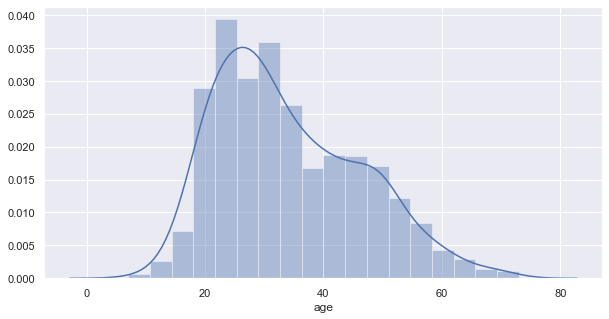

In [8]:
#your answers here
plt.figure(figsize=(10,5))
sns.distplot(user['age']); #univariate plot of age#

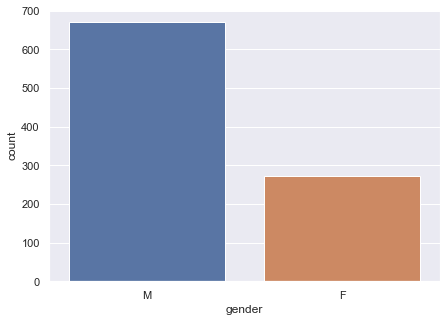

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(user['gender']); #univariate plot of gender#

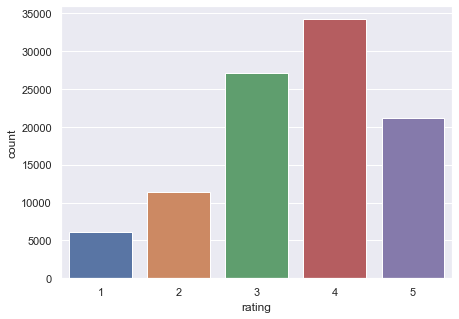

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data['rating']); #univariate plot of rating#

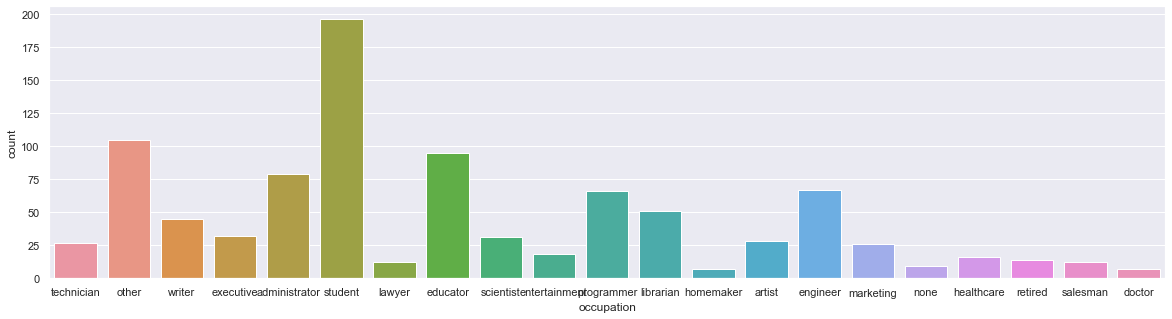

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(user['occupation']); #univariate plot of occupation#

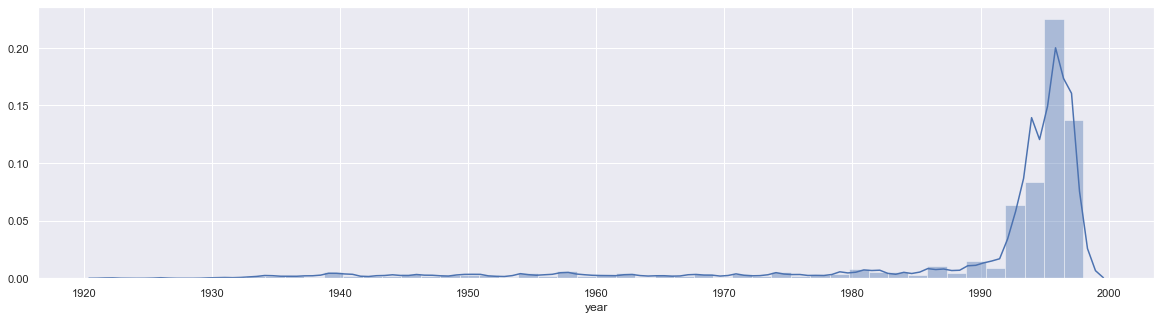

In [12]:
#not working# print (item['release date'].split('-')[2])

item['year'] = pd.DatetimeIndex(item['release date']).year

plt.figure(figsize=(20,5))
sns.distplot(item['year']); #univariate plot of year#

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [46]:
#Your answer here
action_data=item.groupby(['year'])['Action'].sum().sort_values(ascending=False).head(10).reset_index()
action_data
adventure_data=item.groupby(['year'])['Adventure'].sum().sort_values(ascending=False).head(10).reset_index()
adventure_data
animation_data=item.groupby(['year'])['Animation'].sum().sort_values(ascending=False).head(10).reset_index()
animation_data

acad_data = pd.merge(action_data, adventure_data, on='year' )
acadani_data = pd.merge(acad_data, animation_data, on='year' )

acadani_data.head(25)

# This will be working after iterative way but inefficient, so i stoped here, and then create graph using the three variables*


,year,Action,Adventure,Animation
0,1997,46.0,NaN,NaN
1,1996,44.0,NaN,NaN
2,1995,40.0,NaN,NaN
3,1994,30.0,NaN,NaN
4,1993,20.0,NaN,NaN
5,1998,12.0,NaN,NaN
6,1992,8.0,NaN,NaN
7,1990,7.0,NaN,NaN
8,1989,6.0,NaN,NaN
9,1981,6.0,NaN,NaN


In [45]:

action_data=item.groupby(['year'])['Action'].sum().sort_values(ascending=False).head(10).reset_index()
action_data
adventure_data=item.groupby(['year'])['Adventure'].sum().sort_values(ascending=False).head(10).reset_index()
adventure_data
animation_data=item.groupby(['year'])['Animation'].sum().sort_values(ascending=False).head(10).reset_index()
animation_data


byyear = pd.concat([action_data, adventure_data, animation_data], axis=0)
byyear

,year,Action,Adventure,Animation
0,1997,46,20,3
1,1996,44,24,9
2,1995,40,22,6
3,1994,30,13,4
4,1981,6,4,2


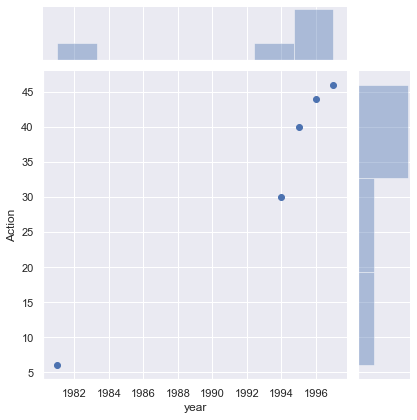

In [117]:
sns.jointplot(acadani_data['year'], acadani_data['Action']);


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [15]:
#your answer here
dataitem = pd.merge(data, item, on='movie id')
dataitem

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1,63,242,3,875747190,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
2,226,242,5,883888671,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
3,154,242,3,879138235,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
4,306,242,5,876503793,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,840,1674,4,891211682,Mamma Roma,01-Jan-1962,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1962
99987,655,1640,3,888474646,"Eighth Day, The",01-Nov-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99988,655,1637,3,888984255,Girls Town,23-Aug-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99989,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur)",02-Feb-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996


In [18]:
top25 = dataitem.groupby('movie title').size().sort_values(ascending=False)[:25]
top25

movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Impossible                    344

In [25]:
toprating = dataitem.groupby('movie title').agg({'rating': [np.size, np.mean]})
toprating.sort_values([('rating', 'mean')], ascending=False).head(25)

rating          
                                                   size      mean
movie title                                                      
Great Day in Harlem, A                                1  5.000000
Prefontaine                                           3  5.000000
Someone Else's America                                1  5.000000
Marlene Dietrich: Shadow and Light (                  1  5.000000
Entertaining Angels: The Dorothy Day Story            1  5.000000
Star Kid                                              3  5.000000
They Made Me a Criminal                               1  5.000000
Aiqing wansui                                         1  5.000000
Saint of Fort Washington, The                         2  5.000000
Santa with Muscles                                    2  5.000000
Pather Panchali                                       8  4.625000
Some Mother's Son                                     2  4.500000
Anna                                                  2  4.500000
Maya Lin: A Strong Clear Vision                       4  4.500000
Everest                                               2  4.500000
Close Shave, A                                      112  4.491071
Schindler's List                                    298  4.466443
Wrong Trousers, The                                 118  4.466102
Casablanca                                          243  4.456790
Wallace & Gromit: The Best of Aardman Animation      67  4.447761
Shawshank Redemption, The                           283  4.445230
Rear Window                                         209  4.387560
Usual Suspects, The                                 267  4.385768
Star Wars                                           583  4.358491
12 Angry Men                                        125  4.344000

In [27]:
atleast100 = toprating['rating']['size'] >= 100
toprating[atleast100].sort_values([('rating', 'mean')], ascending=False)[:25]

rating          
                                                     size      mean
movie title                                                        
Close Shave, A                                        112  4.491071
Schindler's List                                      298  4.466443
Wrong Trousers, The                                   118  4.466102
Casablanca                                            243  4.456790
Shawshank Redemption, The                             283  4.445230
Rear Window                                           209  4.387560
Usual Suspects, The                                   267  4.385768
Star Wars                                             583  4.358491
12 Angry Men                                          125  4.344000
Citizen Kane                                          198  4.292929
To Kill a Mockingbird                                 219  4.292237
One Flew Over the Cuckoo's Nest                       264  4.291667
Silence of the Lambs, The                             390  4.289744
North by Northwest                                    179  4.284916
Godfather, The                                        413  4.283293
Secrets & Lies                                        162  4.265432
Good Will Hunting                                     198  4.262626
Manchurian Candidate, The                             131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark                               420  4.252381
Vertigo                                               179  4.251397
Titanic                                               350  4.245714
Lawrence of Arabia                                    173  4.231214
Maltese Falcon, The                                   138  4.210145
Empire Strikes Back, The                              367  4.204360

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [28]:
dataitemuser = pd.merge(dataitem, user, on='user id')
dataitemuser

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,year,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,1997,49,M,writer,55105
1,196,257,2,881251577,Men in Black,04-Jul-1997,0,1,1,0,...,0,1,0,0,0,1997,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-1996,0,0,0,0,...,1,0,0,0,0,1996,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The",08-Mar-1996,0,0,0,0,...,0,0,0,0,0,1996,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0,0,0,0,...,0,0,0,0,0,1994,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,873,313,5,891392177,Titanic,01-Jan-1997,0,1,0,0,...,1,0,0,0,0,1997,48,F,administrator,33763
99987,873,326,4,891392656,G.I. Jane,01-Jan-1997,0,1,0,0,...,0,0,0,1,0,1997,48,F,administrator,33763
99988,873,348,3,891392577,Desperate Measures,30-Jan-1998,0,0,0,0,...,0,0,1,0,0,1998,48,F,administrator,33763
99989,873,358,2,891392698,Spawn,01-Aug-1997,0,1,1,0,...,0,1,1,0,0,1997,48,F,administrator,33763


In [30]:
dataitemuser.groupby(['gender'])['Drama'].agg('sum')
# answer: Men watch more drama than women = yes 

gender
F    11008
M    28887
Name: Drama, dtype: int64

In [32]:
dataitemuser.groupby(['gender'])['Sci-Fi'].agg('sum')
# answer: Women watch more Sci-Fi than men = no

gender
F     2629
M    10101
Name: Sci-Fi, dtype: int64

In [33]:
dataitemuser.groupby(['gender'])['Romance'].agg('sum')
# answer:  Men watch more Romance than women = yes

gender
F     5858
M    13603
Name: Romance, dtype: int64